# Gettings tweets

From: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/LW0BTB

## Why to get a sample?
A too small dataset won’t carry enough information to learn from, a too huge dataset can be time-consuming to analyze. So how can we choose the good compromise between size and information?

Statistically speaking, we want that our sample keeps the probability distribution of the population under a reasonable significance level. In other words, if we take a look at the histogram of the sample, it must be the same as the histogram of the population.

The simplest thing to do is taking a random sub-sample with uniform distribution and check if it’s significant or not. If it’s reasonably significant, we’ll keep it. If it’s not, we’ll take another sample and repeat the procedure until we get a good significance level.

## Sentiment 
Sentiment analysis (also called opinion mining) uses a combination of data mining,
text and web mining techniques in order to detect, extract and recognize the opinions,
emotions and attitudes towards certain topics. 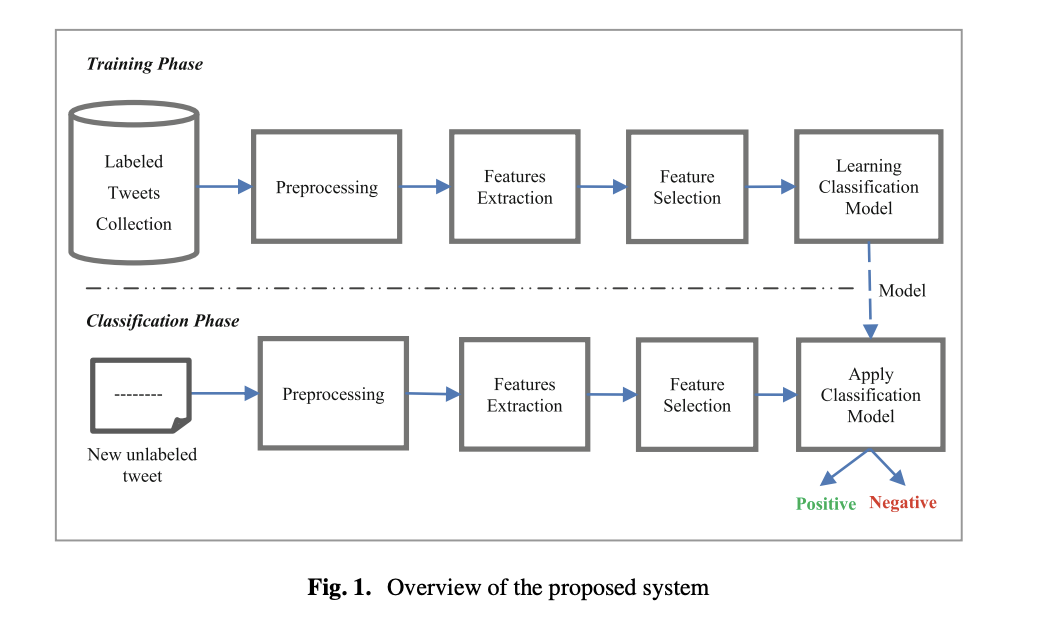

# Random Sample Tweets IDs

In [14]:
import random
import glob

path = 'data/*.txt'
files = glob.glob(path)
tts = [] #tweets
ids = []
i = 0

for text in files:
    with open(text) as f:
        for line in f:
            ids.append(line)
        random_ids = random.sample(ids,50000)
        tts.append(random_ids)
    
#inside just one array
tweets = []
for f in tts:
    tweets += f
len(tweets)

random_sample_input = random.sample(tweets, 200000) #200k tweet sample
len(random_sample_input)

200000

### Cleaning Sample Tweets

In [21]:
sample = []
#removing /n from ids
for element in random_sample_input:
    sample.append(element.strip())

sample

['1242939359613145091',
 '1241011227448533000',
 '1242813765541904386',
 '1247654501307293697',
 '1257115244616396804',
 '1247005977490198528',
 '1249857557872521217',
 '1243077324297428992',
 '1245504349415104521',
 '1240185758662746112',
 '1240477417547812865',
 '1246434693559566336',
 '1247947637237710848',
 '1249186926223134724',
 '1247141866379902976',
 '1243016126054817792',
 '1248361714367807488',
 '1257695883564548096',
 '1242855855885860866',
 '1248281552171270146',
 '1236832174034182144',
 '1247597803964112901',
 '1250817974987964416',
 '1247550553024090112',
 '1235941797819346945',
 '1246078634277863424',
 '1245216198884638721',
 '1242514854922969090',
 '1240225079222362112',
 '1241751323311210496',
 '1237704174311276544',
 '1256463432221708294',
 '1245415790989492227',
 '1235913119890890752',
 '1242157180800897024',
 '1260810981556523010',
 '1245796270511476736',
 '1252760373926735874',
 '1246316032328757248',
 '1247314397019516928',
 '1245106318308003842',
 '12415408603214

In [22]:
with open('sample_data/final_sample_ids.txt', 'w') as file:
    file.writelines("%s\n" % tt for tt in sample)

## Tweets Data

In [15]:
import os
from IPython.display import clear_output

In [16]:
%pip show twarc
%pip show jsonlines
clear_output()

In [17]:
from twarc import Twarc

consumer_key='5kU4EVTL7RyTLQ3GsrGckrVV9'
consumer_secret='9q2D0Guv6aFCSQ1uLjVrEWQHVpnftzpTQaLg5VyYYU9lj9HUaa'

access_token='1318702985468399616-5mi8KT8ETi2qGuwFprpoNFnichxuZ1'
access_token_secret='9EpIn02VD0EnujNqCP23vy1i3GPWH8g2moO8IOWEBLpSo'

t = Twarc(consumer_key, consumer_secret, access_token, access_token_secret)

In [18]:
final_tweet_ids_filename = "sample_data/final_sample_ids.txt" 
output_filename = "sample_data/tweets_output.csv" 

# Hydrate

In [19]:
import jsonlines, json
output_json_filename = output_filename[:output_filename.index(".")] + ".txt"
ids = []

with open(final_tweet_ids_filename, "r") as ids_file:
    ids = ids_file.read().split()
    
hydrated_tweets = []
ids_to_hydrate = set(ids)
if os.path.isfile(output_json_filename):
    with jsonlines.open(output_json_filename, "r") as reader:
        for i in reader.iter(type=dict, skip_invalid=True):
            hydrated_tweets.append(i)
            ids_to_hydrate.remove(i["id_str"])
print("Total IDs: " + str(len(ids)) + ", IDs to hydrate: " + str(len(ids_to_hydrate)))
print("Hydrated: " + str(len(hydrated_tweets)))

count = len(hydrated_tweets)
start_index = count;
num_save  = 1000

for tweet in t.hydrate(ids_to_hydrate):
    hydrated_tweets.append(tweet)
    count += 1
    if (count % num_save) == 0:
        with jsonlines.open(output_json_filename, "a") as writer:
            print("Started IO")
            for hydrated_tweet in hydrated_tweets[start_index:]:
                writer.write(hydrated_tweet)
            print("Finished IO")
        print("Saved " + str(count) + " hydrated tweets.")
        start_index = count
        
if count != start_index:
    print("Here with start_index", start_index)
    with jsonlines.open(output_json_filename, "a") as writer:
        for hydrated_tweet in hydrated_tweets[start_index:]:
            writer.write(hydrated_tweet) 

Total IDs: 200000, IDs to hydrate: 33230
Hydrated: 166635
Here with start_index 166635


## Convert json to csv

In [13]:
# Convert jsonl to csv
import csv, jsonlines

output_json_filename = output_filename[:output_filename.index(".")] + ".txt"
keyset = ["created_at", "id", "id_str", "full_text", "source", "truncated", "in_reply_to_status_id",
          "in_reply_to_status_id_str", "in_reply_to_user_id", "in_reply_to_user_id_str", 
          "in_reply_to_screen_name", "user", "coordinates", "place", "quoted_status_id",
          "quoted_status_id_str", "is_quote_status", "quoted_status", "retweeted_status", 
          "quote_count", "reply_count", "retweet_count", "favorite_count", "entities", 
          "extended_entities", "favorited", "retweeted", "possibly_sensitive", "filter_level", 
          "lang", "matching_rules", "current_user_retweet", "scopes", "withheld_copyright", 
          "withheld_in_countries", "withheld_scope", "geo", "contributors", "display_text_range",
          "quoted_status_permalink"]
hydrated_tweets = []

with jsonlines.open(output_json_filename, "r") as reader:
    for i in reader.iter(type=dict, skip_invalid=True):
        hydrated_tweets.append(i)
        
with  open(output_filename, "w+") as output_file:
    d = csv.DictWriter(output_file, keyset)
    d.writeheader()
    d.writerows(hydrated_tweets)